In [86]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt

In [105]:
def lagranze_gen(knots):
    '''It returns a matrix with all the monomer terms of the lagranze polynomials'''
    def lagranze_basis(x, x_i, x_j):
            return (x-x_j)/(x_i-x_j)
    
    BASES=[]
    for i in range(len(knots)):  
        basis = []
        for j in range(len(knots)):
            if i!=j:
                basis.append(lambda x, x_i=knots[i], x_j=knots[j]: lagranze_basis(x, x_i, x_j))
            else:
                basis.append(lambda x: 1)
        BASES.append(basis)
                  
        
    return BASES

def lagranze_pol_gen(knots):    
    BASES = lagranze_gen(knots)
    
    POL = []
    

    for i in range(len(knots)):
         POL.append(lambda x , a = i: BASES[a][0](x)*BASES[a][1](x)*BASES[a][2](x))

    # for i in range(len(knots)):
    #      POL.append(lambda x , a = i: BASES[a][0](x))

    # for i in range(len(knots)):
    #      for j in range(1,len(knots)):
    #         POL[i]= lambda x, a=i, b=j : POL[a](x)* BASES[a][b](x)
    
    return POL

In [52]:
def pol_gen(knots, values):
    basis = lagranze_gen(knots)
    
    def p(x):
        res = 0
        for i in range(len(knots)):
            res+=values[i]*basis[i](x)
        return res

    basis = lagranze_gen(knots)
    

In [106]:
# Plot the basis space
knots=[0,1,4]
A = lagranze_pol_gen(knots)

x = np.linspace(0,4)
plt.plot(x,A[0](x))
plt.plot(x,A[1](x))
plt.plot(x,A[2](x))


RecursionError: maximum recursion depth exceeded

In [101]:
def lagr_interpolation(knots, values):
    POL = lagranze_pol_gen(knots)
    return lambda x: values[0]*POL[0](x)+values[1]*POL[1](x)+values[2]*POL[2](x)

In [103]:
knots=[0,1,4]
values=[0,2,8]
p = lagr_interpolation(knots, values)

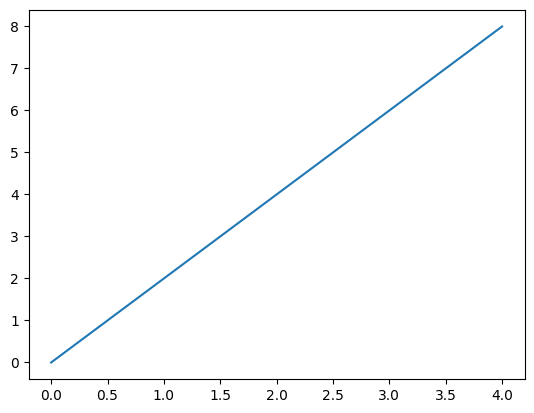

In [104]:
plt.plot(x, p(x))

In [44]:
def lagranze_gen_n(knots):    
    bases = []    
    for i in range(len(knots)): 

        def lagranze_basis(x):
            basis = 1
            for j in range(len(knots)):
                if i!=j:
                    basis *= (x-knots[j])(knots[i]-knots[j])
            return basis
        
    bases.append(lambda x: lagranze_basis(x))

    return bases

In [50]:
lagranze_gen_n(knots)[0](1)

TypeError: 'numpy.int64' object is not callable

In [32]:
def newton_basis(x, order):
    return np.array([x**n for n in range(order)])

def find_coeff (knots, values):
    matrix = np.zeros((len(knots), len(knots)))
    for i in range(len(matrix)):
        a = newton_basis(knots[i], len(knots))
        for j in range(len(matrix[0])):
            matrix[i,j]=a[j]

    return np.linalg.solve(matrix, values)

def interpolation (knots, values):
    return np.poly1d(find_coeff(knots, values))

In [33]:
knots=np.array([0,1,4])
values=np.array([0,2,8])

In [34]:
interpolation(knots, values)(2)

4.0